# API RED ELECTRICA DE ESPAÑA - INTERCAMBIO DE ENERGIA

Vamos a obtener datos de la web de Red Eléctrica de España (https://www.ree.es/es) usando su API y siguiendo la información de la siguiente documentación (https://www.ree.es/es/apidatos).

Los datos a manejar en el presente Notebook serán los relativos aL intercambio entre España y los paises vecinos.

In [1]:
import numpy as np
import pandas as pd

from datetime import datetime

import json
from pandas import Timestamp

import requests
from pprint import pprint

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

import folium

# EXTRACCIÓN

## Automatización de la extracción

Para la categoría de intercambio de la API se decide generar una función que extrae la energia electric intercambiarada los ultimos 12 años (máxima disponibilidad de datos). Estraemos datos mensuales diferenciando entre importación y exportación de cada pais.

In [2]:
def intercambio(category, widgets):
    search_url = "https://apidatos.ree.es/es/datos/"
    time_trunc="month"    
    category == "intercambios"
    Data_gen= {}
    Francia_imp=[]
    Francia_exp=[]
    Portugal_imp=[]
    Portugal_exp=[]
    Marruecos_imp=[]
    Marruecos_exp=[]
    Andorra_imp=[]
    Andorra_exp=[]
    Fecha=[]
    for x in range(2012,2024,2):
        start_date = f"{x}-05-02T00:00"
        end_date= f"{x+2}-05-01T23:59"
        query = f"start_date={start_date}&end_date={end_date}&time_trunc={time_trunc}"
        endpoint = f"{search_url}{category}/{widgets}?{query}"
        print(f"Endpoint: {endpoint}")
        response = requests.get(url = endpoint)
        print(f"response: {response.status_code}")
        data = response.json()
        Data_gen[f"{x}"]=data
            
    for i in Data_gen.keys():
        for w in Data_gen[i]["included"][0]["attributes"]["content"][0]["attributes"]["values"]:
                                Fecha.append(w["datetime"]) 
                
        for g in range(len(Data_gen[i]["included"])):

            if g==0:

                for k in range(2): 
                    if k==0:
                        for j in Data_gen[i]["included"][g]["attributes"]["content"][k]["attributes"]["values"]:
                                Francia_exp.append(j["value"])
                    else:
                        for j in Data_gen[i]["included"][g]["attributes"]["content"][k]["attributes"]["values"]:
                                Francia_imp.append(j["value"])

            elif g==1:

                for k in range(2): 
                    if k==0:
                        for j in Data_gen[i]["included"][g]["attributes"]["content"][k]["attributes"]["values"]:
                                Portugal_exp.append(j["value"])
                    else:
                            for j in Data_gen[i]["included"][g]["attributes"]["content"][k]["attributes"]["values"]:
                                Portugal_imp.append(j["value"])

            elif g==2:

                for k in range(2): 
                    if k==0:
                        for j in Data_gen[i]["included"][g]["attributes"]["content"][k]["attributes"]["values"]:
                                Marruecos_exp.append(j["value"])
                    else:
                            for j in Data_gen[i]["included"][g]["attributes"]["content"][k]["attributes"]["values"]:
                                Marruecos_imp.append(j["value"])

            elif g==3:

                for k in range(2): 
                    if k==0:
                        for j in Data_gen[i]["included"][g]["attributes"]["content"][k]["attributes"]["values"]:
                                Andorra_exp.append(j["value"])
                    else:
                            for j in Data_gen[i]["included"][g]["attributes"]["content"][k]["attributes"]["values"]:
                                Andorra_imp.append(j["value"])
         
    DF=pd.DataFrame({  "Fecha": Fecha,
                       "Importacion Francia": Francia_imp,
                       "Exportacion Francia": Francia_exp,
                       "Importacion Portugal": Portugal_imp,
                       "Exportacion Portugal": Portugal_exp,
                       "Importacion Marruecos": Marruecos_imp,
                       "Exportacion Marruecos": Marruecos_exp,
                       "Importacion Andorra": Andorra_imp,
                       "Exportacion Andorra": Andorra_exp})
    
       
    return DF

In [3]:
df_gen_3=intercambio("intercambios","todas-fronteras-fisicos")

Endpoint: https://apidatos.ree.es/es/datos/intercambios/todas-fronteras-fisicos?start_date=2012-05-02T00:00&end_date=2014-05-01T23:59&time_trunc=month
response: 200
Endpoint: https://apidatos.ree.es/es/datos/intercambios/todas-fronteras-fisicos?start_date=2014-05-02T00:00&end_date=2016-05-01T23:59&time_trunc=month
response: 200
Endpoint: https://apidatos.ree.es/es/datos/intercambios/todas-fronteras-fisicos?start_date=2016-05-02T00:00&end_date=2018-05-01T23:59&time_trunc=month
response: 200
Endpoint: https://apidatos.ree.es/es/datos/intercambios/todas-fronteras-fisicos?start_date=2018-05-02T00:00&end_date=2020-05-01T23:59&time_trunc=month
response: 200
Endpoint: https://apidatos.ree.es/es/datos/intercambios/todas-fronteras-fisicos?start_date=2020-05-02T00:00&end_date=2022-05-01T23:59&time_trunc=month
response: 200
Endpoint: https://apidatos.ree.es/es/datos/intercambios/todas-fronteras-fisicos?start_date=2022-05-02T00:00&end_date=2024-05-01T23:59&time_trunc=month
response: 200


In [4]:
df_gen_3

,Fecha,Importacion Francia,Exportacion Francia,Importacion Portugal,Exportacion Portugal,Importacion Marruecos,Exportacion Marruecos,Importacion Andorra,Exportacion Andorra
0,2012-05-01T00:00:00.000+02:00,447064.570,-213033.611,229832.204,-938561.572,114.80,-419670.60,0.26,-10975.35
1,2012-06-01T00:00:00.000+02:00,576567.600,-99903.189,258228.549,-940756.552,44.10,-409672.30,0.36,-9837.92
2,2012-07-01T00:00:00.000+02:00,597233.510,-100171.349,174652.981,-831043.878,0.00,-470131.90,0.00,-64.82
3,2012-08-01T00:00:00.000+02:00,489400.041,-154849.168,268423.731,-725316.823,0.50,-509035.00,0.00,-14833.03
4,2012-09-01T00:00:00.000+02:00,267397.124,-197847.201,220995.196,-838708.653,0.05,-482004.97,0.02,-17134.17
...,...,...,...,...,...,...,...,...,...
133,2023-01-01T00:00:00.000+01:00,315199.649,-1252101.073,812211.152,-623876.920,19637.70,-151329.60,0.00,-42454.13
134,2023-02-01T00:00:00.000+01:00,344673.793,-937173.160,570791.150,-692816.850,26980.60,-214092.90,0.00,-21205.52
135,2023-03-01T00:00:00.000+01:00,206570.516,-1369903.338,136381.920,-1423083.207,26559.60,-160263.50,1.86,-23109.71
136,2023-04-01T00:00:00.000+02:00,240684.660,-1077189.301,56398.217,-1460829.408,49984.40,-155462.50,4.34,-14631.16


## Transformación

Se pasa la energía Intercambiada de MWh a GWh

In [5]:
for j in range(1,9): 
    df_gen_3[f"{df_gen_3.columns[j]}"]=df_gen_3[f"{df_gen_3.columns[j]}"].apply(lambda x : round(x/1000,2))   

In [6]:
df_gen_3.iloc[:,0]=df_gen_3.iloc[:,0].apply(lambda x : x[0:10])

In [7]:
df_gen_3

,Fecha,Importacion Francia,Exportacion Francia,Importacion Portugal,Exportacion Portugal,Importacion Marruecos,Exportacion Marruecos,Importacion Andorra,Exportacion Andorra
0,2012-05-01,447.06,-213.03,229.83,-938.56,0.11,-419.67,0.0,-10.98
1,2012-06-01,576.57,-99.90,258.23,-940.76,0.04,-409.67,0.0,-9.84
2,2012-07-01,597.23,-100.17,174.65,-831.04,0.00,-470.13,0.0,-0.06
3,2012-08-01,489.40,-154.85,268.42,-725.32,0.00,-509.04,0.0,-14.83
4,2012-09-01,267.40,-197.85,221.00,-838.71,0.00,-482.00,0.0,-17.13
...,...,...,...,...,...,...,...,...,...
133,2023-01-01,315.20,-1252.10,812.21,-623.88,19.64,-151.33,0.0,-42.45
134,2023-02-01,344.67,-937.17,570.79,-692.82,26.98,-214.09,0.0,-21.21
135,2023-03-01,206.57,-1369.90,136.38,-1423.08,26.56,-160.26,0.0,-23.11
136,2023-04-01,240.68,-1077.19,56.40,-1460.83,49.98,-155.46,0.0,-14.63


## VISUALIZACIÓN

Visualizamos el intercambio de energía con un mapa usando la librería Folium.

In [9]:
#Preparo los datos para trabajar con folium
Paises_=["Francia","Marruecos","Portugal","Andorra"]

In [10]:
#Creo un DataFrame con las coordenada de cada pais

Coor_pais=[[48.8588897,2.320041],[38.7077507,-9.1365919],[31.1728205,-7.3362482],[42.5407167,1.5732033]]

df_Coor_pais=pd.DataFrame(Coor_pais)

df_Coor_pais

,0,1
0,48.858890,2.320041
1,38.707751,-9.136592
2,31.172821,-7.336248
3,42.540717,1.573203


In [11]:
# Obtengo los datos de importación y exportación por paises.

df_pais_imp=df_gen_3.iloc[:,range(1,9,2)]

df_pais_exp=df_gen_3.iloc[:,range(1,9,2)]

df_pais_exp

# Calculo la media para poder usar estos datos en folium

media_pais_imp=df_pais_imp[:].mean()

media_pais_exp=df_pais_exp[:].mean()

In [12]:
#genero un data frame para usar con folium con los paises y coordenadas.
df_imp=pd.DataFrame({"Paises Importación": Paises_ ,"Coordenadas Paises": Coor_pais })
df_imp

,Paises Importación,Coordenadas Paises
0,Francia,"[48.8588897, 2.320041]"
1,Marruecos,"[38.7077507, -9.1365919]"
2,Portugal,"[31.1728205, -7.3362482]"
3,Andorra,"[42.5407167, 1.5732033]"


In [13]:
sf_map = folium.Map(location = [40.4167047, -3.7035825], zoom_start =4)

In [14]:
# Inicializamos un FeatureGroup() para los incidentes en el DataFrame
incidents = folium.map.FeatureGroup()

# Recorre los 100 crímenes y agrega a cada uno al FeatureGroup() de incidentes
# la columna Y y X son las coordenadas, latitud y longitud respectivamente

for label, x, exp, imp in zip(df_imp["Paises Importación"], df_imp["Coordenadas Paises"], media_pais_exp, media_pais_imp): 
    
    incidents.add_child(folium.Marker(location = [x[0], x[1]],
                                      popup = f"País: {label.title()}\nExp: {round(exp, 2)}Gw/h\nImp: {round(imp, 2)}Gw/h"))


# Agrega incidentes al mapa
sf_map.add_child(incidents)

sf_map

In [17]:
Francia_=list(df_gen_3["Importacion Francia"])
Francia_.extend(list(df_gen_3["Exportacion Francia"]))
Tipo_=["I" for i in range(138)]
Tipo_.extend(["E" for i in range(138)])

In [18]:
df_Francia=pd.DataFrame({"Francia": Francia_, "Importación o Exportación": Tipo_})

In [19]:
Portugal_=list(df_gen_3["Importacion Portugal"])
Portugal_.extend(list(df_gen_3["Exportacion Portugal"]))
Tipo_=["I" for i in range(138)]
Tipo_.extend(["E" for i in range(138)])

In [20]:
df_Portugal=pd.DataFrame({"Portugal": Portugal_, "Importación o Exportación": Tipo_})

In [21]:
Marruecos_=list(df_gen_3["Importacion Marruecos"])
Marruecos_.extend(list(df_gen_3["Exportacion Marruecos"]))
Tipo_=["I" for i in range(138)]
Tipo_.extend(["E" for i in range(138)])

In [22]:
df_Marruecos=pd.DataFrame({"Marruecos": Marruecos_, "Importación o Exportación": Tipo_})

In [23]:
Andorra_=list(df_gen_3["Importacion Andorra"])
Andorra_.extend(list(df_gen_3["Exportacion Andorra"]))
Tipo_=["I" for i in range(138)]
Tipo_.extend(["E" for i in range(138)])

In [24]:
df_Andorra=pd.DataFrame({"Andorra": Andorra_, "Importación o Exportación": Tipo_})

In [25]:
df_Paises=pd.DataFrame({"Francia": Francia_,  "Portugal": Portugal_, "Marruecos": Marruecos_, "Andorra": Andorra_, "Importación o Exportación": Tipo_})

In [26]:
df_Paises

,Francia,Portugal,Marruecos,Andorra,Importación o Exportación
0,447.06,229.83,0.11,0.00,I
1,576.57,258.23,0.04,0.00,I
2,597.23,174.65,0.00,0.00,I
3,489.40,268.42,0.00,0.00,I
4,267.40,221.00,0.00,0.00,I
...,...,...,...,...,...
271,-1252.10,-623.88,-151.33,-42.45,E
272,-937.17,-692.82,-214.09,-21.21,E
273,-1369.90,-1423.08,-160.26,-23.11,E
274,-1077.19,-1460.83,-155.46,-14.63,E


In [27]:
etiquetas = sorted(df_Paises.columns[0:4])
etiquetas
x = np.arange(len(etiquetas)) 
x

array([0, 1, 2, 3])

<Figure size 1000x1000 with 0 Axes>

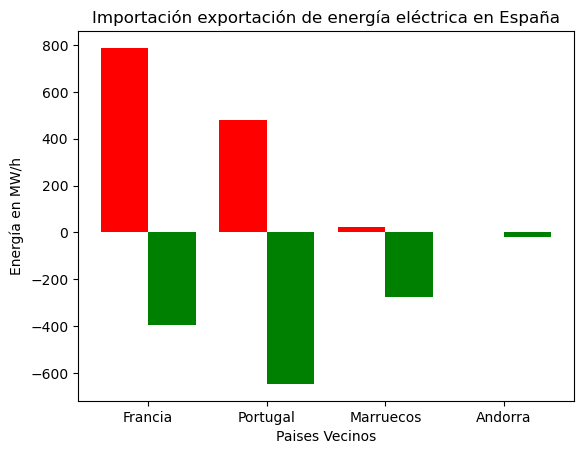

In [28]:
plt.figure(figsize = (10, 10))

fig, ax = plt.subplots()

etiquetas = df_Paises.columns[0:4]

valores1 = df_Paises[df_Paises["Importación o Exportación"]=="I"]["Francia"].mean()
valores2 = df_Paises[df_Paises["Importación o Exportación"]=="E"]["Francia"].mean()

valores3 = df_Paises[df_Paises["Importación o Exportación"]=="I"]["Portugal"].mean()
valores4 = df_Paises[df_Paises["Importación o Exportación"]=="E"]["Portugal"].mean()

valores5 = df_Paises[df_Paises["Importación o Exportación"]=="I"]["Marruecos"].mean()
valores6 = df_Paises[df_Paises["Importación o Exportación"]=="E"]["Marruecos"].mean()

valores7 = df_Paises[df_Paises["Importación o Exportación"]=="I"]["Andorra"].mean()
valores8 = df_Paises[df_Paises["Importación o Exportación"]=="E"]["Andorra"].mean()

x = np.arange(len(etiquetas))  
width = 0.4

plt.bar(x[0] - width/2, valores1, width, color = "red")
plt.bar(x[0] + width/2, valores2, width, color = "green")

plt.bar(x[1] - width/2, valores3, width, color = "red")
plt.bar(x[1] + width/2, valores4, width, color = "green")

plt.bar(x[2] - width/2, valores5, width, color = "red")
plt.bar(x[2] + width/2, valores6, width, color = "green")

plt.bar(x[3] - width/2, valores7, width, color = "red")
plt.bar(x[3] + width/2, valores8, width, color = "green")

ax.set_xticks(x)
ax.set_xticklabels(etiquetas)

plt.title("Importación exportación de energía eléctrica en España")

plt.xlabel("Paises Vecinos")

plt.ylabel("Energía en MW/h")

plt.show()